Convolutional neural network
using the CIFAR image dataset (image recognition)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#loading and unpacking the data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#Normalizing the data into values between 0 - 1
train_images, test_images = train_images / 255, test_images / 255
#creating a class for the items we have in this dataset, in corresponance to their order in the output layer.
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog","frog","horse","ship","truck" ]

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

<function matplotlib.pyplot.show>

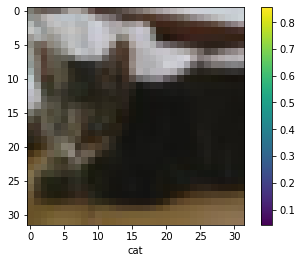

In [ ]:
#Visualizing the images in our datasets.
img_indx =9

plt.imshow(train_images[img_indx])
plt.colorbar()
plt.xlabel(class_names[train_labels[img_indx][0]])
plt.show

In [ ]:
#CNN Architceture
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape = (32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
#adding dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10))

In [ ]:
#Training the model
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics="accuracy")
model.fit(train_images,train_labels,epochs = 1, validation_data= (test_images,test_labels))

1563/1563 [==============================] - 78s 50ms/step - loss: 1.3807 - accuracy: 0.5009 - val_loss: 1.2411 - val_accuracy: 0.5578


In [ ]:
#evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =2)
print(test_acc)

313/313 - 4s - loss: 1.2411 - accuracy: 0.5578 - 4s/epoch - 11ms/step
0.5577999949455261
